In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import warnings

# Filter out DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
df=pd.read_csv('../Travel_Dataset/Travel details dataset.csv')
df.head()

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [3]:
# there are three rows we don't consider
    # 2 of which have no information expect for a trip id (72, 128)
    # 1 of which does not have a transportation type and transportation cost (83) 
num_rows = df.shape[0]
print(f"orginal number of rows: {num_rows}")

# get rid of rows with missing data
df = df.dropna()

# unique_Trip_ID = df['Trip ID'].unique()
# print(unique_Trip_ID)

num_rows = df.shape[0]
print(f"new number of rows: {num_rows}")

orginal number of rows: 139
new number of rows: 136


# data that needs to be cleaned
* Destination
* Accommodation cost
* Transportation cost

In [4]:
# Get unique destination country names after cleaning
unique_Destination = df['Destination'].unique()
print(unique_Destination)

# Extracting unique country names from 'Destination' column
unique_destinations = df['Destination'].apply(lambda x: x.split(', ')[-1]).unique()

# Function to clean and standardize destination country names
def clean_destination(unique_destinations):
    country_map = {
        'Thai': 'Thailand',
        'AUS': 'Australia',
        'Aus': 'Australia',
        'SA': 'South Africa',
        'UK': 'United Kingdom',
        'USA': 'United States',
        'UAE': 'United Arab Emirates',
        'NZ': 'New Zealand',
        'Hawaii': 'United States'  # Assuming Hawaii is in the United States
        # Add more mappings as needed
    }

    # Replace country abbreviations or alternate representations with full country names
    return country_map.get(unique_destinations, unique_destinations)

# Apply cleaning function to the 'Destination' column
df['Destination'] = df['Destination'].apply(lambda x: clean_destination(x.split(', ')[-1]))

# Get unique country names from the cleaned 'Destination' column
unique_countries = df['Destination'].unique()

# Print the cleaned list of unique countries
print(f"\nCleaned unique countries:\n{unique_countries}")



['London, UK' 'Phuket, Thailand' 'Bali, Indonesia' 'New York, USA'
 'Tokyo, Japan' 'Paris, France' 'Sydney, Australia'
 'Rio de Janeiro, Brazil' 'Amsterdam, Netherlands'
 'Dubai, United Arab Emirates' 'Cancun, Mexico' 'Barcelona, Spain'
 'Honolulu, Hawaii' 'Berlin, Germany' 'Marrakech, Morocco'
 'Edinburgh, Scotland' 'Paris' 'Bali' 'London' 'Tokyo' 'New York' 'Sydney'
 'Rome' 'Bangkok' 'Hawaii' 'Barcelona' 'Japan' 'Thailand' 'France'
 'Australia' 'Brazil' 'Greece' 'Egypt' 'Mexico' 'Italy' 'Spain' 'Canada'
 'New York City, USA' 'Bangkok, Thailand' 'Vancouver, Canada'
 'Sydney, AUS' 'Seoul, South Korea' 'Los Angeles, USA' 'Rome, Italy'
 'Cape Town' 'Cape Town, SA' 'Sydney, Aus' 'Bangkok, Thai' 'Phuket, Thai'
 'Dubai' 'Seoul' 'Rio de Janeiro' 'Amsterdam' 'Phuket' 'Santorini'
 'Phnom Penh' 'Athens, Greece' 'Cape Town, South Africa'
 'Auckland, New Zealand']

Cleaned unique countries:
['United Kingdom' 'Thailand' 'Indonesia' 'United States' 'Japan' 'France'
 'Australia' 'Brazil' 'Netherland

In [5]:
unique_Accommodation_Cost = df['Accommodation cost'].unique()
print(unique_Accommodation_Cost)

df['Accommodation cost'] = df['Accommodation cost'].str.replace(r'\s+|\$|USD', '', regex=True)
df['Accommodation cost']  = df['Accommodation cost'].str.replace(r'[\,]', '', regex=True)
# Get unique values after removing the '$' sign

# Convert cost to an inte
df['Accommodation cost'] = df['Accommodation cost'].astype(int)


df['Accommodation cost']

['1200' '800' '1000' '2000' '700' '1500' '500' '900' '2500' '3000' '1400'
 '600' '$900 ' '$1,500 ' '$1,200 ' '$600 ' '$1,000 ' '$700 ' '$400 '
 '$1,400 ' '$2,000 ' '$1,100 ' '$800 ' '$200 ' '$150 ' '$500 ' '$180 '
 '$350 ' '2200' '400' '1100' '300' '1300' '1800' '500 USD' '1000 USD'
 '800 USD' '1200 USD' '400 USD' '600 USD' '900 USD' '1500 USD' '700 USD'
 '300 USD' '200 USD' '$300 ' '200' '5000' '7000' '6000' '4000' '8000']


0      1200
1       800
2      1000
3      2000
4       700
       ... 
134    2500
135    5000
136    2000
137    6000
138    7000
Name: Accommodation cost, Length: 136, dtype: int64

In [6]:
unique_Transportation_Cost = df['Transportation cost'].unique()
print(unique_Transportation_Cost)

# Remove $ and USD from costs
df['Transportation cost'] = df['Transportation cost'].str.replace(r'\s+|\$|USD', '', regex=True)

# Remove commas from costs
df['Transportation cost'] = df['Transportation cost'].str.replace(r'[\,]', '', regex=True)


# Convert cost to an inte
df['Transportation cost'] = df['Transportation cost'].astype(int)

df['Transportation cost']

['600' '500' '700' '1000' '200' '800' '1200' '100' '400' '150' '$400 '
 '$700 ' '$150 ' '$800 ' '$100 ' '$600 ' '$80 ' '$500 ' '$300 ' '$50 '
 '$120 ' '$75 ' '900' '50' '$200 ' '$250 ' '$20 ' '300' '800 USD'
 '200 USD' '500 USD' '700 USD' '300 USD' '600 USD' '400 USD' '1000 USD'
 '100 USD' '350 USD' '150 USD' '$1,200 ' '$900 ' '$1,500 ' '$1,000 ' '250'
 '2500' '1500' '2000' '3000']


0       600
1       500
2       700
3      1000
4       200
       ... 
134    2000
135    3000
136    1000
137    2500
138    2500
Name: Transportation cost, Length: 136, dtype: int64

In [16]:
df['Total cost'] = df['Accommodation cost'] + df['Transportation cost']
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total cost
0,1,United Kingdom,5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600,1800
1,2,Thailand,6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500,1300
2,3,Indonesia,7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700,1700
3,4,United States,8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000,3000
4,5,Japan,9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,Brazil,8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000,4500
135,136,Canada,8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000,8000
136,137,Thailand,9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000,3000
137,138,Spain,9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,8500


# K-Means Algorithm
- This `kmeans` function takes in a data frame and uses the **L2** norm to calculate distance.
- It checks for convergence by calculating the reconstruction error after each step and stops onces the error has changed no more than the specified `tol` from the previous step.

We initially run the k-means algorithm on our traveler data using travel duration, traveler age, accommodation cost, and transportation cost.

In [17]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

def kmeans(df, k=4, tol=0.05):
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """   

    # Convert the DataFrame to a NumPy array
    data = df.values

    prev_err = np.inf
    count = 0 # Keeps track of iterations

    # Initialize centroids randomly
    rows = df.shape[0]
    indices = np.random.choice(rows, k, replace=False)
    centroids = data[indices]
    # print(centroids)

    while True:
        count += 1
        # Assign data points to clusters
        dists = np.array([0]*k) # to store distances, initialize to all 0's
        clusters = np.array([-1]*len(data)) # to store which cluster each data point belongs to, initialize to all -1's

        for i, point in enumerate(data):
            dists = [distance(point, cent) for cent in centroids]
            assignment = dists.index(min(dists))
            clusters[i] = assignment
        
        # Calculate new centroids
        updated_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            cluster_points = data[clusters == j]
            updated_centroids[j] = np.mean(cluster_points, axis=0)
    
        # Calculate reconstruction error
        err = 0
        for l, cent in enumerate(centroids):
            cluster_points = data[clusters == l]
            err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
            
        # Check for convergence
        if abs(err - prev_err) < tol:
            meanerror = err / len(data)
            print(f"Done at iteration {count} with change of {err-prev_err} and mean error of {meanerror}.")
            break
        
        prev_err = err
        centroids = updated_centroids
    
    return centroids, clusters, meanerror


centroids, clusters, meanerror = kmeans(df[['Duration (days)','Traveler age','Total cost']],k=4)

Done at iteration 13 with change of 0.0 and mean error of 198443.6918274128.


/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)


/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)


Done at iteration 3 with change of 0.0 and mean error of 196380.69607811817.
Done at iteration 11 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 13 with change of 0.0 and mean error of 198443.69182741278.


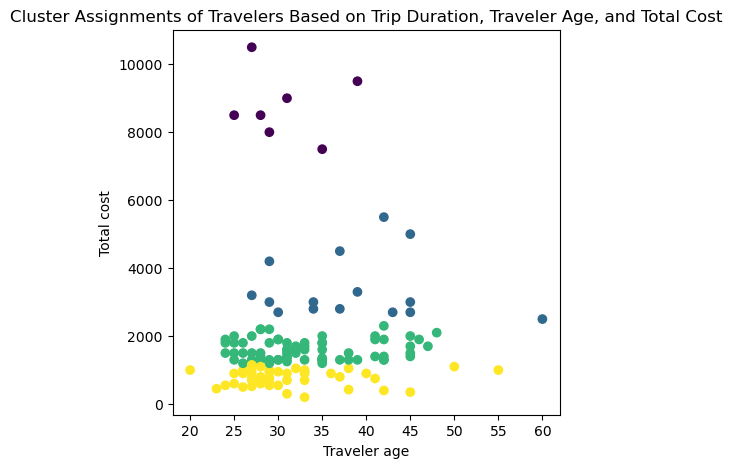

In [18]:
# Different clusters every time function is ran
centroids, clusters, meanerror1 = kmeans(df[['Duration (days)','Traveler age','Total cost']],k=4)

centroids, clusters, meanerror2 = kmeans(df[['Duration (days)','Traveler age','Total cost']],k=4)

centroids, clusters, meanerror3 = kmeans(df[['Duration (days)','Traveler age','Total cost']],k=4)

# Scatter plot
df['Cluster'] = clusters
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(df['Traveler age'],df['Total cost'],c=clusters)
plt.xlabel("Traveler age")
plt.ylabel("Total cost")
plt.title("Cluster Assignments of Travelers Based on Trip Duration, Traveler Age, and Total Cost")
plt.show()

In [19]:
print(centroids)
print(type(centroids))

column_values = ['Duration (days)', 'Traveler age', 'Total cost'] 
cent_df = pd.DataFrame(data = centroids,  
                  columns = column_values) 
print(cent_df)
print(type(cent_df))

[[6.57142857e+00 3.05714286e+01 8.78571429e+03]
 [8.00000000e+00 3.84000000e+01 3.39333333e+03]
 [7.61428571e+00 3.32571429e+01 1.59500000e+03]
 [7.63636364e+00 3.15000000e+01 7.76704545e+02]]
<class 'numpy.ndarray'>
   Duration (days)  Traveler age   Total cost
0         6.571429     30.571429  8785.714286
1         8.000000     38.400000  3393.333333
2         7.614286     33.257143  1595.000000
3         7.636364     31.500000   776.704545
<class 'pandas.core.frame.DataFrame'>


# Best k value for K-means

/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/2816045543.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/2816045543.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/2816045543.py:42: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points

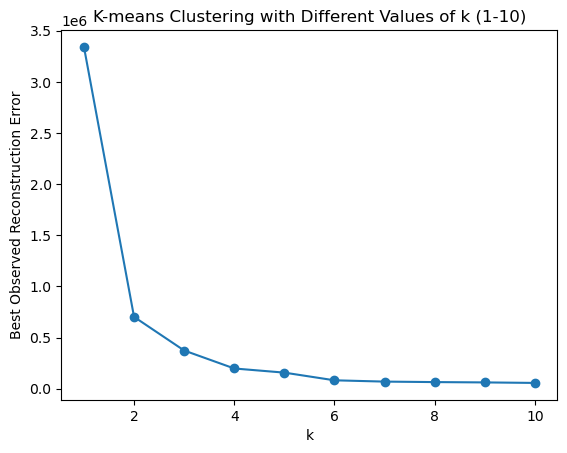

In [21]:
def kmeans_no_print(df, k=4, tol=0.05):
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """   

    # Convert the DataFrame to a NumPy array
    data = df.values

    prev_err = np.inf
    count = 0 # Keeps track of iterations

    # Initialize centroids randomly
    rows = df.shape[0]
    indices = np.random.choice(rows, k, replace=False)
    centroids = data[indices]
    # print(centroids)

    while True:
        count += 1
        # Assign data points to clusters
        dists = np.array([0]*k) # to store distances, initialize to all 0's
        clusters = np.array([-1]*len(data)) # to store which cluster each data point belongs to, initialize to all -1's

        for i, point in enumerate(data):
            dists = [distance(point, cent) for cent in centroids]
            assignment = dists.index(min(dists))
            clusters[i] = assignment
        
        # Calculate new centroids
        updated_centroids = np.zeros((k, data.shape[1]))
        for j in range(k):
            cluster_points = data[clusters == j]
            updated_centroids[j] = np.mean(cluster_points, axis=0)
    
        # Calculate reconstruction error
        err = 0
        for l, cent in enumerate(centroids):
            cluster_points = data[clusters == l]
            err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
            
        # Check for convergence
        if abs(err - prev_err) < tol:
            meanerror = err / len(data)
            #print(f"Done at iteration {count} with change of {err-prev_err} and mean error of {meanerror}.")
            break
        
        prev_err = err
        centroids = updated_centroids
    
    return centroids, clusters, meanerror
# Initialize variables to store results
k_values = list(range(1, 11))
best_errors = []

# Loop over different values of k
for k in k_values:
    min_err = np.inf
    best_centroids = None
    best_clusters = None
    best_err = None
    
    # Run k-means 10 times
    for i in range(10):
        centroids, clusters, meanerror = kmeans_no_print(df[['Duration (days)','Traveler age','Total cost']],k=k)
        
        # Check if the current run has the minimum reconstruction error
        if meanerror < min_err:
            min_err = meanerror
            best_centroids = centroids
            best_clusters = clusters
            best_err = meanerror
    
    # Store the best observed reconstruction error for the current k
    best_errors.append(best_err)

# Plot the results
plt.plot(k_values, best_errors, marker='o')
plt.xlabel('k')
plt.ylabel('Best Observed Reconstruction Error')
plt.title('K-means Clustering with Different Values of k (1-10)')
plt.show()

Based on this elbow plot, we are going to move forward with $k=4$. Originally, we tried to use $k=3$, but the scatter plots of the clusters showed that $k=4$ is the better option.

# Run K-means Multiple Times
- To ensure we get the best result for a given value of __k__, we will run kmeans multiple times and report the best one.

/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/

Done at iteration 12 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 11 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 6 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 11 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 13 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 6 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 10 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 6 with change of 0.0 and mean error of 197743.99413580733.
Done at iteration 13 with change of 0.0 and mean error of 198443.6918274128.


/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/888309260.py:45: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  err += np.sum(distance(point, cent) ** 2 for point in cluster_points)
/

Done at iteration 6 with change of 0.0 and mean error of 200663.30084033613.
Done at iteration 10 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 8 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 8 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 11 with change of 0.0 and mean error of 198443.6918274128.
Done at iteration 10 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 11 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 11 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 10 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 12 with change of 0.0 and mean error of 198443.69182741278.
Done at iteration 7 with change of 0.0 and mean error of 197743.9941358073.
19 197743.9941358073


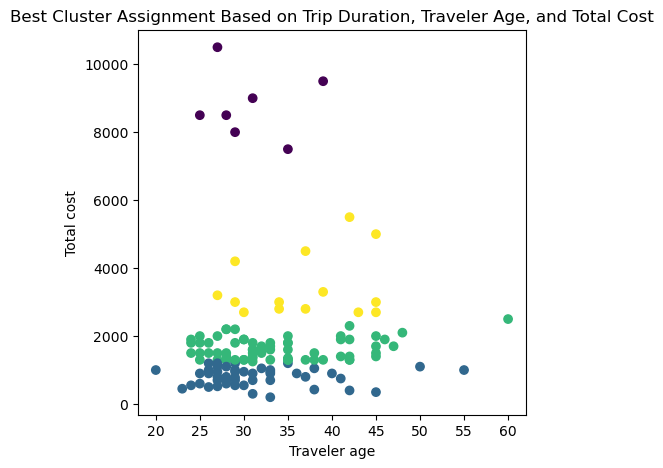

In [27]:
meanerrors = np.array([0.0]*20) 
assignments = pd.DataFrame(np.zeros((num_rows, df.shape[1])))
for i in range(20):
    centroids, clusters, meanerror = kmeans(df[['Duration (days)','Traveler age','Total cost']],k=4)
    meanerrors[i] = meanerror
    assignments[i] = clusters
# print(assignments.shape)
# print(assignments)
# print(meanerrors.shape)
# print(meanerrors)

# Lowest reconstruction error cluster
# lowest_error = meanerrors.index(min(meanerrors))
min_idx = -1
min_err = np.inf
for j in range(len(meanerrors)):
    if meanerrors[j] < min_err:
        min_err = meanerrors[j]
        min_idx = j
print(min_idx,min_err)

lowest_cluster = assignments[min_idx].tolist()

# Scatter plot
df['Best Cluster'] = lowest_cluster
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(df['Traveler age'],df['Total cost'],c=lowest_cluster)
plt.xlabel("Traveler age")
plt.ylabel("Total cost")
plt.title("Best Cluster Assignment Based on Trip Duration, Traveler Age, and Total Cost")
plt.show()


# Modified K-means for Non-numeric Data
- To calculate distance between categories like Destination and Accommodation Type, we can use Jaccard distance in addition to Euclidean distance.
- The distance between two travelers is some combination of the distance between their numeric data and distance between their destinations/accommodation types.

In [30]:
def euc_distance(traveler1, traveler2):
    p1 = traveler1[['Duration (days)','Traveler age','Total cost']]
    p2 = traveler2[['Duration (days)','Traveler age','Total cost']]
    
    return np.sqrt(np.sum((p1-p2)**2))

def jacc_distance(traveler1, traveler2):
    #Do the thing
    p1 = traveler1['Dest&Acc']
    p1 = {x for x in p1 if x==x}

    p2 = traveler2['Dest&Acc']
    p2 = {x for x in p2 if x==x}
    
    numer = len(p1.intersection(p2))
    denom = len(p1.union(p2))
    
    dist =  numer/denom
    return 1-dist

# Add a column that stores the types as a set in the dataframe
df['Dest&Acc'] = df.apply(lambda row: set([row['Destination'], row['Accommodation type']]), axis=1)
print(df.head(3))

dfp = df[['Duration (days)','Traveler age','Total cost', 'Dest&Acc']]

   Trip ID     Destination Start date   End date  Duration (days)  \
0        1  United Kingdom   5/1/2023   5/8/2023              7.0   
1        2        Thailand  6/15/2023  6/20/2023              5.0   
2        3       Indonesia   7/1/2023   7/8/2023              7.0   

  Traveler name  Traveler age Traveler gender Traveler nationality  \
0    John Smith          35.0            Male             American   
1      Jane Doe          28.0          Female             Canadian   
2     David Lee          45.0            Male               Korean   

  Accommodation type  Accommodation cost Transportation type  \
0              Hotel                1200              Flight   
1             Resort                 800              Flight   
2              Villa                1000              Flight   

   Transportation cost  Total cost  Cluster  Best Cluster  \
0                  600        1800        2             2   
1                  500        1300        2             2   
2 

In [33]:
def compute_dist(traveler1, traveler2):
    dist=euc_distance(traveler1, traveler2)+jacc_distance(traveler1, traveler2)
    return dist

def union_types():
    None

def kmeans2(df, k=4, tol=0.05):
    """
    Usage: input 
        df=data frame, 
        k=# of clusters
        tol=tolerance for L_2 convergance check on centroids
    """   

    # Convert the DataFrame to a NumPy array
    data = df.values
    
    prev_err = np.inf
    count = 0 # Keeps track of iterations

    # Initialize centroids randomly
    rows = df.shape[0]
    indices = np.random.choice(rows, k, replace=False)
    centroids = data[indices]

    column_values = ['Duration (days)','Traveler age','Total cost', 'Dest&Acc'] 
    cent_df = pd.DataFrame(data = centroids,  
                  columns = column_values)

    while True:
        count += 1
        # Assign data points to clusters
        dists = np.array([0]*k) # to store distances, initialize to all 0's
        clusters = np.array([-1]*len(data)) # to store which cluster each data point belongs to, initialize to all -1's

        for j, point in enumerate(data):
            dists = [compute_dist(df.iloc[j], cent_df.iloc[i]) for i in range(k)]
            assignment = dists.index(min(dists))
            clusters[j] = assignment

        # Calculate new centroids
        updated = pd.DataFrame()
        updated = pd.DataFrame(columns=['Duration (days)','Traveler age','Total cost', 'Dest&Acc'])
    
        for l in range(k):
            cluster_points = df[clusters == l]
            # Union all sets in the 'Types' column into one big set
            all_types = set.union(*df['Dest&Acc'])
            means = np.mean(cluster_points[['Duration (days)','Traveler age','Total cost']], axis=0) # calculate averages of the hp, attack, and defense
            # Convert to numpy array
            new_centroid = {'Duration (days)': means.iloc[0], 'Traveler age': means.iloc[1], 'Total cost': means.iloc[2], 'Dest&Acc': list(all_types)}
            updated.loc[l] = new_centroid

        # Calculate reconstruction error
        err = 0
        for f, cent in enumerate(updated.values):
            cluster_points = df[clusters == f]
            err += np.sum(compute_dist(cluster_points.iloc[g], updated.iloc[f])**2 for g in range(len(cluster_points)))

        # Check for convergence
        if abs(err - prev_err) < tol:
            meanerror = err / len(data)
            print(f"Done at iteration {count} with change of {err-prev_err} and mean error of {meanerror}.")
            break
        
        prev_err = err
        cent_df = updated
    
    return centroids, clusters, meanerror


# Add a column that stores the types as a set in the dataframe
df['Dest&Acc'] = df.apply(lambda row: set([row['Destination'], row['Accommodation type']]), axis=1)

dfp = df[['Duration (days)','Traveler age','Total cost', 'Dest&Acc']]
centroids_, clusters_, meanerror_ = kmeans2(dfp,k=4)

Done at iteration 9 with change of 0.0 and mean error of 199057.2848101281.


Done at iteration 10 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 8 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 9 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 9 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 10 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 5 with change of 0.0 and mean error of 201285.94480972.
Done at iteration 9 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 9 with change of 0.0 and mean error of 199057.28481012807.
Done at iteration 7 with change of 0.0 and mean error of 197072.0740198831.
Done at iteration 9 with change of 0.0 and mean error of 199057.28481012807.
8 197072.0740198831


/var/folders/p1/rws0lf4n5hsb343l_ghfsw900000gn/T/ipykernel_32134/205125351.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['Best Cluster w/Dest&Acc'] = lowest_cluster_


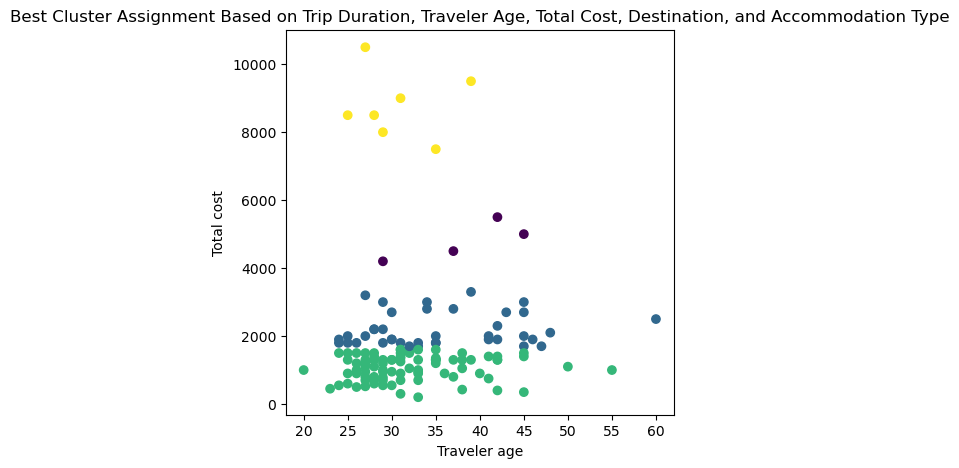

In [35]:
meanerrors_ = np.array([0.0]*10) 
assignments_ = pd.DataFrame(np.zeros((num_rows, df.shape[1])))
for i in range(10):
    centroids_, clusters_, meanerror_ = kmeans2(dfp,k=4)
    meanerrors_[i] = meanerror_
    assignments_[i] = clusters_

min_idx_ = -1
min_err_ = np.inf
for j in range(len(meanerrors_)):
    if meanerrors_[j] < min_err_:
        min_err_ = meanerrors_[j]
        min_idx_ = j
print(min_idx_,min_err_)

lowest_cluster_ = assignments_[min_idx_].tolist()

# Scatter plot
dfp['Best Cluster w/Dest&Acc'] = lowest_cluster_
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(dfp['Traveler age'],dfp['Total cost'],c=lowest_cluster_)
plt.xlabel("Traveler age")
plt.ylabel("Total cost")
plt.title("Best Cluster Assignment Based on Trip Duration, Traveler Age, Total Cost, Destination, and Accommodation Type")
plt.show()


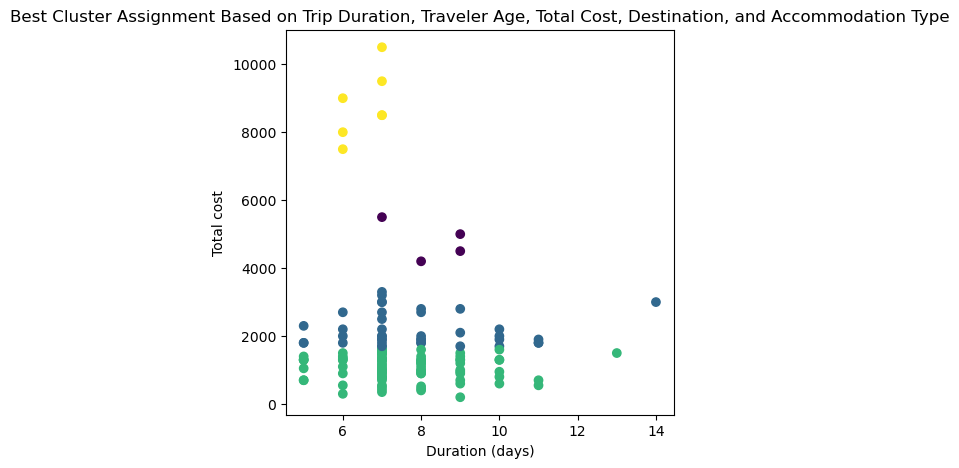

In [36]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(dfp['Duration (days)'],dfp['Total cost'],c=lowest_cluster_)
plt.xlabel("Duration (days)")
plt.ylabel("Total cost")
plt.title("Best Cluster Assignment Based on Trip Duration, Traveler Age, Total Cost, Destination, and Accommodation Type")
plt.show()

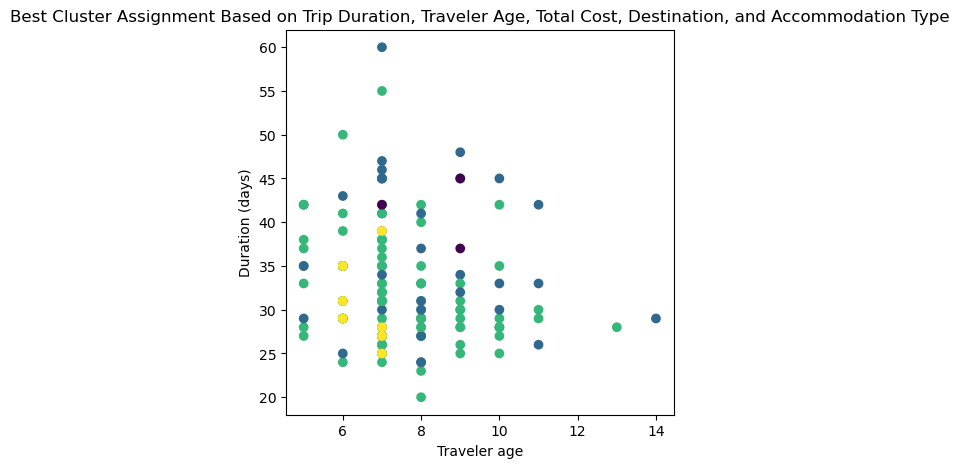

In [41]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter(dfp['Duration (days)'],dfp['Traveler age'],c=lowest_cluster_)
plt.xlabel("Traveler age")
plt.ylabel("Duration (days)")
plt.title("Best Cluster Assignment Based on Trip Duration, Traveler Age, Total Cost, Destination, and Accommodation Type")
plt.show()

Next: Compare Accommodation cost and Transportation cost as separate values.
- age and Accommodation cost
- age and Transportation cost
- duration and Accommodation cost
- maybe gender and accommodation type